In [1]:
import os
from tensorflow.python.summary.summary_iterator import summary_iterator
import pandas as pd
import numpy as np

2023-03-07 16:42:46.552319: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 16:42:56.428650: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 16:42:56.429279: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-07 16:43:24.440737: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [2]:
result_path = "../../slurm/runs/Comparion_RPI/RPINet"

In [59]:
def createDf(train, val, name):
    data = np.array(train).T
    df = pd.DataFrame({name+"_train":data[1]})
    df = df.set_index(data[0])
    
    data = np.array(val).T
    df2 = pd.DataFrame({name+"_val":data[1]})
    df2 = df2.set_index(data[0])
    
    return pd.merge(df, df2,how="outer" ,left_index=True, right_index=True)

events = None
for f in os.listdir(result_path):
    if f.startswith("events.out"):
        events = f

trains = []
vals = []

edges_trains = []
edges_vals = []

node_trains = []
node_vals = []

node_accuracy = []
node_accurcy_val = []

epoch_loss = []
epoch_loss_val = []

for e in summary_iterator(os.path.join(result_path, events)):
    for v in e.summary.value:
        if v.tag == 'Loss/train':
            trains.append((e.step,v.simple_value))
        if v.tag == 'Loss/val':
            vals.append((e.step,v.simple_value))
        if v.tag == 'Loss_edges/train':
            edges_trains.append((e.step,v.simple_value))
        if v.tag == 'Loss_edges/val':
            edges_vals.append((e.step,v.simple_value))
        if v.tag == 'Loss_nodes/train':
            node_trains.append((e.step,v.simple_value))
        if v.tag == 'Loss_nodes/val':
            node_vals.append((e.step,v.simple_value))
        if v.tag == 'Node_Accuracy/train':
            node_accuracy.append((e.step,v.simple_value))
        if v.tag == 'Node_Accuracy/val':
            node_accurcy_val.append((e.step,v.simple_value))
        if v.tag == 'Epoch_Loss/train':
            epoch_loss.append((e.step,v.simple_value))
        if v.tag == 'Epoch_Loss/val':
            epoch_loss_val.append((e.step,v.simple_value))



In [104]:
Loss = createDf(epoch_loss, epoch_loss_val, "Loss")
Loss["epoch"]=Loss.index
Node_accuracy = pd.DataFrame({"Accuracy":np.array(node_accuracy).T[1]})
Node_accuracy["step"] = Node_accuracy.index

In [105]:
Node_accuracy

,Accuracy,step
0,0.266667,0
1,0.266372,1
2,0.283939,2
3,0.289552,3
4,0.254132,4
...,...,...
16517,0.701160,16517
16518,0.732394,16518
16519,0.701219,16519
16520,0.717143,16520


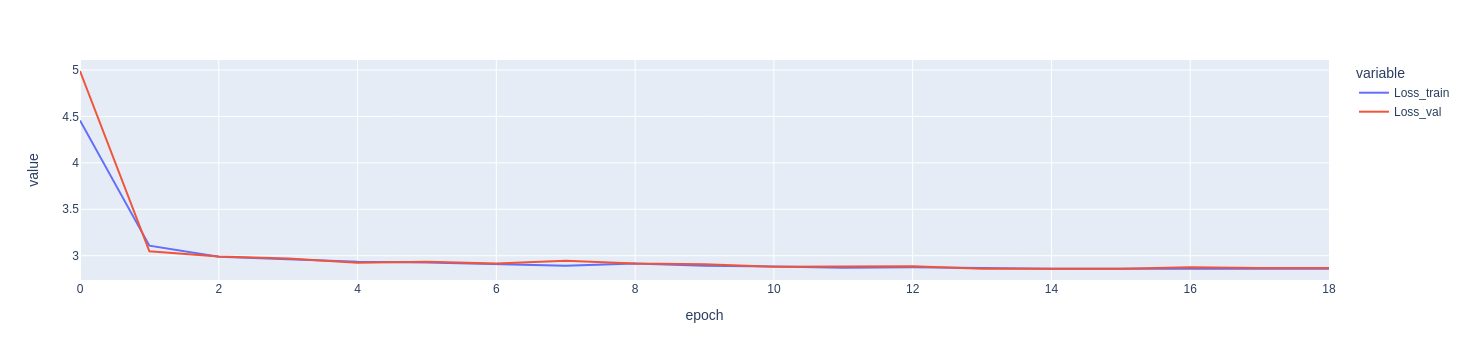

In [93]:
import plotly.express as px
ml = pd.melt(Loss, id_vars="epoch")
fig = px.line(ml,x="epoch", y="value", color="variable")
fig.show()

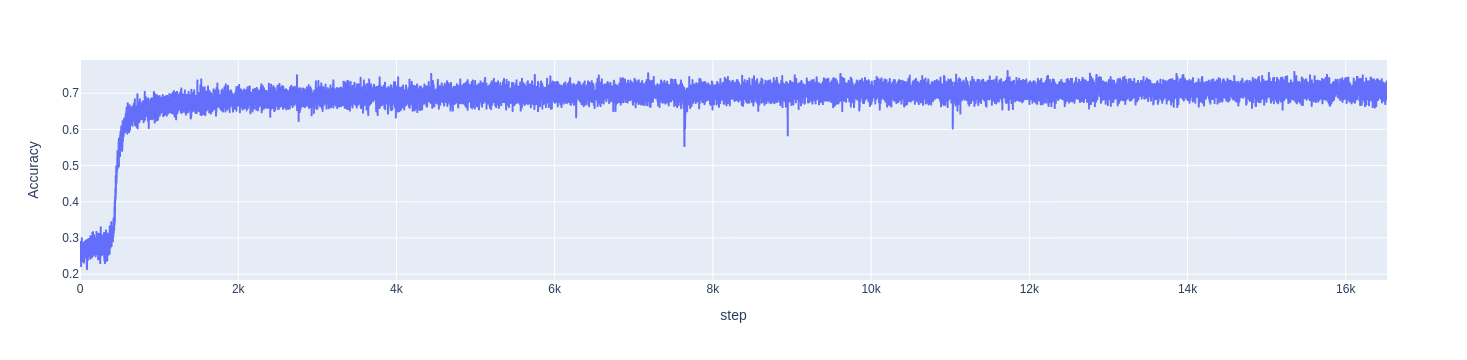

In [106]:
fig = px.line(Node_accuracy,x="step", y="Accuracy")
fig.show()

In [108]:
import torch
t1 = torch.tensor([[0,1],[1,0],[1,2],[2,1], [2,3], [3,2]])


KeyboardInterrupt

